Check the accuracy of the SVM (linear) method for the data used in the part of Lab. 8 on the lack of separability for different values of C . Determine the margin width as a function of C . NOTE, you may find that the values of C , for which changes occur, are quite small and that it is necessary to represent the efficiency from C in a semi-logarithmic plot.

1. Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.model_selection import GridSearchCV

In [ ]:
# data (Gaussian distribution)
def draw_data(n1, n2, m1, m2, S1, S2):
    data1 = np.random.multivariate_normal(m1, S1, n1)
    data2 = np.random.multivariate_normal(m2, S2, n2)
    data = np.concatenate((data1, data2), axis = 0)
    data = pd.DataFrame(data, columns=["x", "y"])
    data["group"] = np.repeat([0, 1], [n1, n2])
    return data


m1, m2 = [-1, -1], [2, 2] #mean
S1 = [[4, 2], [2, 4]] #covariance matrix
n1, n2 = 30, 20 #number of points

np.random.seed(129)
data = draw_data(n1, n2, m1, m2, S1, S1)

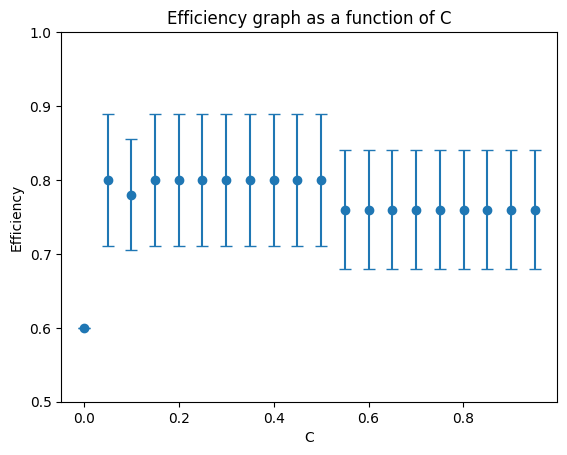

In [11]:
#looking for the right parameter, starting with C << 1

param_grid = {'C': np.arange(0.0001,1,0.05)}

clf = svm.SVC(kernel = "linear")

clf_grid = GridSearchCV(clf, param_grid)
clf_grid.fit(data[["x", "y"]], data.group)

plt.errorbar(param_grid["C"], clf_grid.cv_results_["mean_test_score"], clf_grid.cv_results_["std_test_score"], fmt="o", capsize=4)
plt.ylim(0.5, 1)
plt.title('Efficiency graph as a function of C')
plt.ylabel('Efficiency')
plt.xlabel('C')
plt.show()

# I choose to focus on values < 0.1

Text(0.5, 0, 'C')

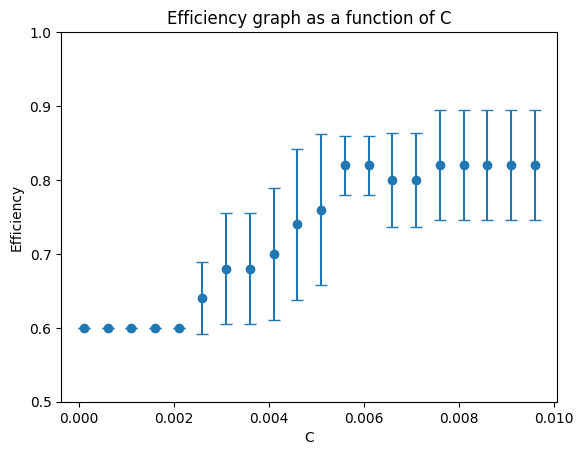

In [13]:
param_grid = {'C': np.arange(0.0001,0.01,0.0005)}

clf = svm.SVC(kernel = "linear")

clf_grid = GridSearchCV(clf, param_grid)
clf_grid.fit(data[["x", "y"]], data.group)

plt.errorbar(param_grid["C"], clf_grid.cv_results_["mean_test_score"], clf_grid.cv_results_["std_test_score"], fmt="o", capsize=4)
plt.ylim(0.5, 1)
plt.title('Efficiency graph as a function of C')
plt.ylabel('Efficiency')
plt.xlabel('C')

In [20]:
# counting margin value for all C values
margins=[]
param_grid = {'C': np.linspace(0.0001,0.01,20)}
for i in param_grid['C']:
    clf = svm.SVC(kernel = "linear", C = i)
    clf.fit(data[["x", "y"]], data.group)
    w = clf.coef_[0]
    m=2/np.linalg.norm(w)
    margins.append(m)

Text(0.5, 0, 'C')

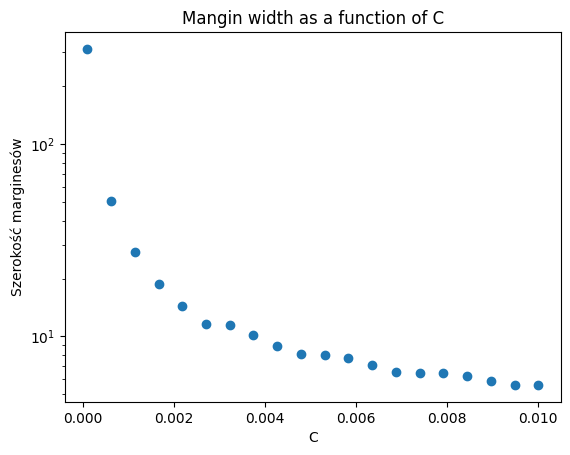

In [ ]:
plt.scatter(param_grid['C'], margins)
plt.yscale('log')
plt.title('Margin width as a function of C')
plt.ylabel('Szerokość marginesów')
plt.xlabel('C')

result: as the value of the regularization parameter C decreases, the margin of the linear SVM increases. This is because smaller values of C allow the model to tolerate more misclassifications in favor of finding a larger separating margin. In contrast, higher C values force the model to fit the training data more strictly, resulting in a narrower margin.